<a href="https://colab.research.google.com/github/MerkulovDaniil/optim/blob/master/assets/Notebooks/Eigencats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image
import os
import tarfile
import urllib.request

# Download and extract dataset parts
def download_and_extract(url, extract_path="."):
    print(f"Downloading {url}")
    file_name = os.path.join(extract_path, url.split("/")[-1])
    urllib.request.urlretrieve(url, file_name)

    print(f"Extracting {file_name}")
    with tarfile.open(file_name, "r:gz") as tar:
        tar.extractall(path=extract_path)

# Load the dataset of cat faces (color images)
def load_dataset(directories):
    image_list = []
    for directory in directories:
        for filename in os.listdir(directory):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                with Image.open(os.path.join(directory, filename)) as im:
                    # Resize to a common size, e.g., 64x64
                    im = im.convert('L').resize((64, 64))
                    image_list.append(np.asarray(im).flatten())
    print(f"🐱 Loaded {len(image_list)} cats.")
    return np.array(image_list)

base_url = "https://github.com/fferlito/Cat-faces-dataset/raw/master"
parts = ["dataset-part1.tar.gz", "dataset-part2.tar.gz", "dataset-part3.tar.gz"]

for part in parts:
    download_and_extract(os.path.join(base_url, part))

directories = ["./dataset-part1", "./dataset-part2", "./dataset-part3"]
X = load_dataset(directories)

n_row = 2
n_col = 2
indices = np.random.choice(X.shape[0], n_row * n_col, replace=False)

Extracting ./dataset-part1.tar.gz
Extracting ./dataset-part2.tar.gz
Extracting ./dataset-part3.tar.gz
🐱 Loaded 29843 cats.


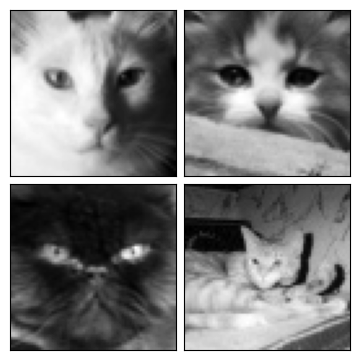

In [152]:
# Select random 10 indices from the dataset

n_row = 2
n_col = 2

def plot_random_images(X, indices=indices, h=64, w=64, n_row=n_row, n_col=n_col):
    plt.figure(figsize=(1.7 * n_col, 1.7 * n_row))
    plt.subplots_adjust(bottom=0, left=0, right=1, top=1, hspace=.05, wspace=0.05)

    for i, idx in enumerate(indices[:n_row*n_col]):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(X[idx].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

    plt.show()
plot_random_images(X)

# Calculating eigencats

In [ ]:
from jax import numpy as jnp
X_std = X - jnp.mean(X, axis=0)
U, S, V = jnp.linalg.svd(X_std, full_matrices=False)

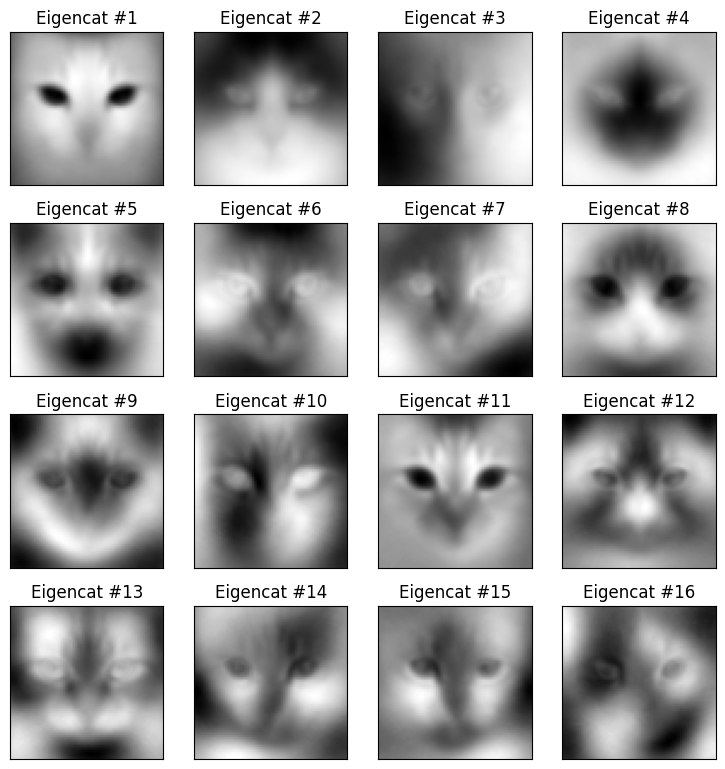

In [154]:
def plot_eigenfaces(u=U, sigmas=S, vt=V, n_row=4, n_col=4):
    """Helper function to plot a gallery of portraits"""
    n_components = n_row*n_col
    h, w = 64, 64
    eigenfaces = vt[:n_components]
    plt.figure(figsize=(1.8 * n_col, 2.1 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)

        plt.imshow(eigenfaces[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(f"Eigencat #{i+1}", size=12)
        plt.xticks(())
        plt.yticks(())

plot_eigenfaces()
plt.savefig("eigencats.png")

# Rank $r$ reconstruction

7204.693
Rank 5 compression


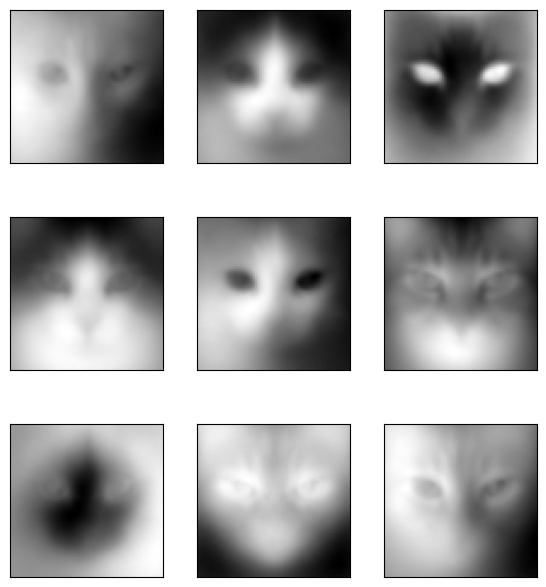

In [131]:
def plot_projections(rank = 5, indices=indices, u=U, sigmas=S, vt=V, n_row=3, n_col=3):
    """Helper function to plot a gallery of portraits"""
    n_components = n_row*n_col
    h, w = 64, 64
    reconstructions = u[indices, :rank] @ jnp.diag(S[:rank]) @ vt[:rank]
    print(jnp.linalg.norm(reconstructions - X_std[indices]))
    plt.figure(figsize=(1.8 * n_col, 2.1 * n_row))
    print(f"Rank {rank} compression")
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(reconstructions[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

plot_projections()

# Animation

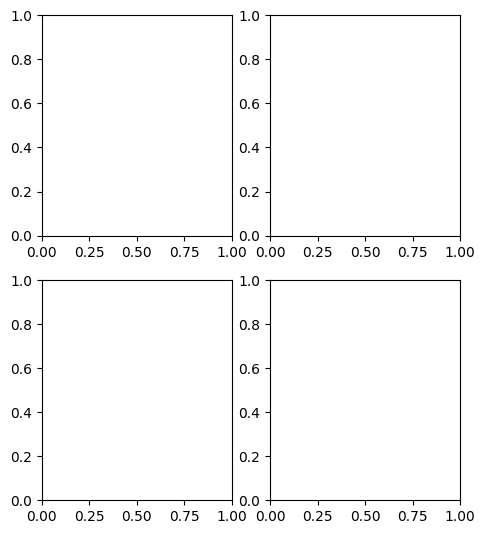

Rank 1 compression
Rank 1 compression
Rank 2 compression
Rank 3 compression
Rank 4 compression
Rank 5 compression
Rank 6 compression
Rank 7 compression
Rank 8 compression
Rank 9 compression
Rank 10 compression
Rank 11 compression
Rank 12 compression
Rank 13 compression
Rank 14 compression
Rank 15 compression
Rank 16 compression
Rank 17 compression
Rank 18 compression
Rank 19 compression
Rank 20 compression
Rank 21 compression
Rank 22 compression
Rank 23 compression
Rank 24 compression
Rank 25 compression
Rank 26 compression
Rank 27 compression
Rank 28 compression
Rank 29 compression
Rank 30 compression
Rank 31 compression
Rank 32 compression
Rank 33 compression
Rank 34 compression
Rank 35 compression
Rank 36 compression
Rank 37 compression
Rank 38 compression
Rank 39 compression
Rank 40 compression
Rank 41 compression
Rank 42 compression
Rank 43 compression
Rank 44 compression
Rank 45 compression
Rank 46 compression
Rank 47 compression
Rank 48 compression
Rank 49 compression
Rank 50 co

In [148]:
from matplotlib.animation import FuncAnimation
def plot_projections(rank=1, indices=indices, u=U, sigmas=S, vt=V, n_row=2, n_col=2, ax=None):
    """Helper function to plot a gallery of portraits"""
    n_components = n_row*n_col
    h, w = 64, 64
    reconstructions = u[indices, :rank] @ jnp.diag(S[:rank]) @ vt[:rank]
    print(f"Rank {rank} compression")

    if ax is not None:
        for ax_ in ax.flatten():
            ax_.clear()
            fig = ax[0, 0].figure
    else:
        fig, ax = plt.subplots(n_row, n_col, figsize=(1.8 * n_col, 1.8 * n_row))
        plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.9, hspace=.1)

    for i in range(n_row * n_col):
        ax[i//n_col, i%n_col].imshow(reconstructions[i].reshape((h, w)), cmap=plt.cm.gray)
        ax[i//n_col, i%n_col].axis('off')

    fig.suptitle(f"🐱 Compressing kittens with PCA. Rank {rank}")

fig, ax = plt.subplots(2, 2, figsize=(5.4, 6.3))
ani = FuncAnimation(fig, plot_projections, frames=range(1, 1024), repeat=False, fargs=(indices, U, S, V, 2, 2, ax))
plt.show()
ani.save('animation.mp4', writer='ffmpeg', fps=30, dpi=100)

# Color eigencats (independently on RGB channels)

🐱 Loaded 29843 cats.


IndexError: ignored

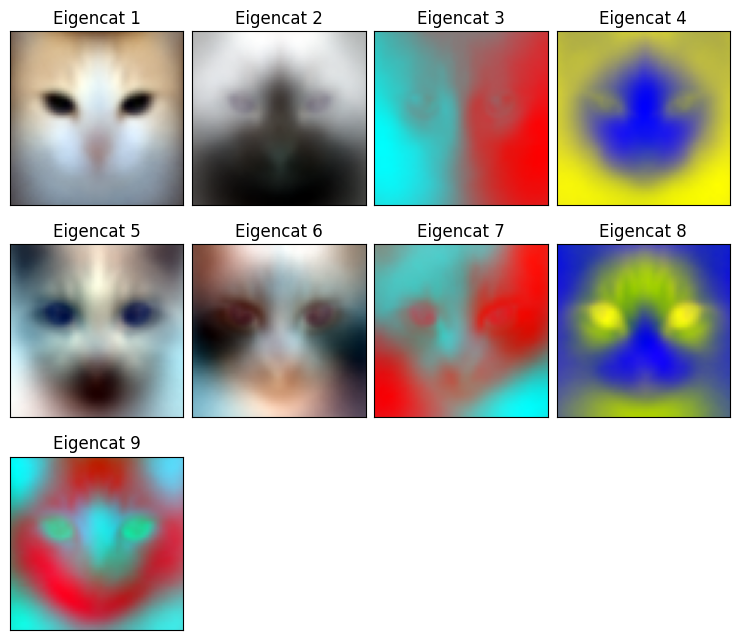

In [155]:
def load_dataset(directories):
    image_list = []
    for directory in directories:
        for filename in os.listdir(directory):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                with Image.open(os.path.join(directory, filename)) as im:
                    # Resize to a common size, e.g., 64x64 and ensure RGB
                    im = im.resize((64, 64))
                    if im.mode != 'RGB':
                        im = im.convert('RGB')
                    image_list.append(np.asarray(im))
    print(f"🐱 Loaded {len(image_list)} cats.")
    return np.array(image_list)

X_rgb = load_dataset(directories)

def compute_rgb_pca(X_rgb, n_components=9):
    h, w, _ = X_rgb[0].shape
    # Separate the RGB channels
    X_r = X_rgb[:, :, :, 0].reshape(len(X_rgb), h*w)
    X_g = X_rgb[:, :, :, 1].reshape(len(X_rgb), h*w)
    X_b = X_rgb[:, :, :, 2].reshape(len(X_rgb), h*w)

    # Apply PCA on each channel
    pca_r = PCA(n_components=n_components).fit(X_r)
    pca_g = PCA(n_components=n_components).fit(X_g)
    pca_b = PCA(n_components=n_components).fit(X_b)

    # Stack eigenfaces
    eigenfaces_rgb = np.stack([
        pca_r.components_.reshape(-1, h, w),
        pca_g.components_.reshape(-1, h, w),
        pca_b.components_.reshape(-1, h, w)
    ], axis=-1)

    return eigenfaces_rgb

eigenfaces_rgb = compute_rgb_pca(X_rgb)

def plot_colored_eigenfaces(eigenfaces, h=64, w=64, n_row=4, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.1 * n_row))
    plt.subplots_adjust(bottom=0, left=0, right=1, top=1, hspace=.05, wspace=0.05)

    # Normalize the eigenfaces values to range [0,1] for visualization
    def normalize(arr):
        arr_min = np.min(arr)
        return (arr - arr_min) / (np.max(arr) - arr_min)

    for i in range(n_row * n_col):
        eigenface = eigenfaces[i]
        eigenface = np.stack([normalize(eigenface[:, :, channel]) for channel in range(3)], axis=-1)

        # Rescale to [0, 255]
        eigenface = (eigenface * 255).astype(np.uint8)

        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(eigenface)
        plt.title(f"Eigencat {i+1}")
        plt.xticks(())
        plt.yticks(())

    plt.show()

plot_colored_eigenfaces(eigenfaces_rgb)

# Vectorized colour eigencats

🐱 Loaded 29843 cats.


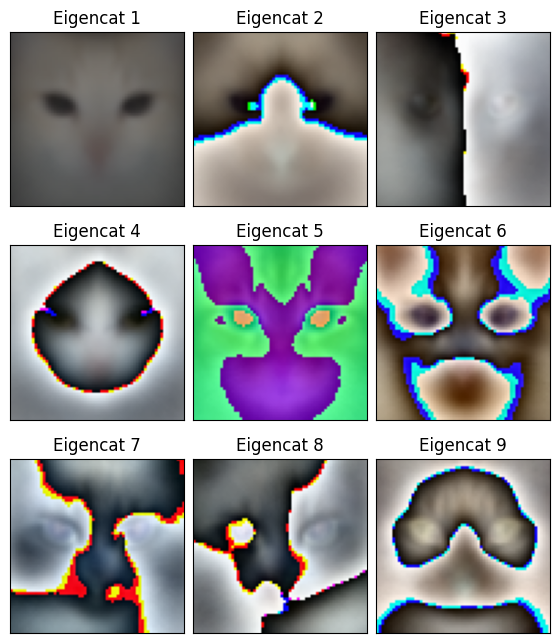

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from PIL import Image
import os
import tarfile
import urllib.request

# Load the dataset of cat faces (color images)
def load_dataset(directories):
    image_list = []
    for directory in directories:
        for filename in os.listdir(directory):
            if filename.endswith(".jpg") or filename.endswith(".png"):
                with Image.open(os.path.join(directory, filename)) as im:
                    # Resize to a common size, e.g., 64x64 and ensure it's in RGB format
                    im = im.resize((64, 64))
                    if im.mode != 'RGB':
                        im = im.convert('RGB')
                    image_list.append(np.asarray(im).flatten())
    print(f"🐱 Loaded {len(image_list)} cats.")
    return np.array(image_list)

# Plot random images with colors
def plot_random_images(X, h=64, w=64, n_row=3, n_col=3):
    plt.figure(figsize=(1.7 * n_col, 1.7 * n_row))
    plt.subplots_adjust(bottom=0, left=0, right=1, top=1, hspace=.05, wspace=0.05)

    indices = np.random.choice(X.shape[0], n_row * n_col, replace=False)

    for i, idx in enumerate(indices):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(X[idx].reshape((h, w, 3)).astype(np.uint8))
        plt.xticks(())
        plt.yticks(())
    plt.show()

# Plot the eigenfaces (for color images)
def plot_eigenfaces(eigenfaces, h=64, w=64, n_row=2, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.1 * n_row))
    plt.subplots_adjust(bottom=0, left=0, right=1, top=1, hspace=.05, wspace=0.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        # Ensure the data is of type uint8 for correct color rendering
        plt.imshow((eigenfaces[i].reshape((h, w, 3)) * 255*40).astype(np.uint8))
        plt.title(f"Eigencat {i+1}")
        plt.xticks(())
        plt.yticks(())
    plt.show()

directories = ["./dataset-part1", "./dataset-part2", "./dataset-part3"]
X = load_dataset(directories)

# Apply PCA to extract eigenfaces
n_components = 9  # The number of eigenfaces you'd like to extract
pca = PCA(n_components=n_components).fit(X)

# Plot the eigenfaces
plot_eigenfaces(pca.components_, h=64, w=64, n_row=3, n_col=3)